#**CS6140 - Machine Learning**
##**Spring 2024 Homework Assignment 4**

Submission Instructions:
- Please complete this homework assignment in the same notebook provided.
- Submit your completed assignment on Canvas by the deadline.

Submission Deadline:
**April 21st, 2024**

<p align="justify">
Please read the instructions carefully when answering questions and ensure your code works correctly before submission. The grader will run your code for grading the coding questions without any adjustment.
</p>

#@markdown ### Enter your first and last names below:
First Name = "" #@param {type:"Vijay"}
Last Name = "" #@param {type:"Venkatesan"}

##**Problem Description**

Financial institutions that lend to consumers rely on models to help decide on who to approve or decline for credit (for lending products such as credit cards, automobile loans, or home loans). In this project, your task is to develop models that review credit card applications to determine which ones should be approved. You are given historical data on response (binary default indicator) and 20 predictor variables from credit card accounts for a hypothetical bank XYZ, a regional bank in the Bay area. There are three datasets available: a [training](https://raw.githubusercontent.com/mh2t/CS6140/main/Homework/HW4/HW4-Train.csv) dataset with 20,000 accounts; a [validation](https://raw.githubusercontent.com/mh2t/CS6140/main/Homework/HW4/HW4-Validation.csv) dataset with 3,000 accounts, and a **hidden** test dataset with 5,000 accounts. Information about the variables is given in the [Appendix](https://github.com/mh2t/CS6140/blob/main/Homework/HW4/HW4-appx.pdf).

You are asked to do the following and also address specific questions below:

* **(10 points)** Do any necessary data pre-processing in preparation for modeling.
* **(20 points)** Develop and fit a logistic regression (LR) model, assess its performance, and interpret the results.
* **(20 points)** Develop an additional model based on a machine learning (ML) algorithm selected from one of the following: Random Forest, Gradient Boosting (XGBoost or another implementation), or Feedforward Neural Network; assess its performance, and make sure to explain why you chose this particular algorithm.
* **(10 points)** Compare the results from the ML algorithm with those from logistic regression model and discuss their advantages and disadvantages; select one of these models for credit approval; and describe the reasons for your selection.
* **(5 points)** Describe what performance metrics you chose to evalaute your proposed models and why.
* **(10 points)** Describe how you would use it to make decisions on future credit card applications.
* **(5 points)** Do customers who already have an account with the financial institution receive any favorable treatment in your model? Support your answer with appropriate analysis.
* **(20 points)** 2-page report.
* You can use any libraries for this homework.



##**Deliverables**

Please submit the following:

1. A report (doc file) that describes all important steps in your data analysis,
model development, comparison of the models, and answer to the specific questions in addition to justification for your final model selection. The body of the report should be no more than 2 pages in length (font size 11 and spacing 1.2).
2. The codes you used for the analysis should have brief but adequate annotations so that we can run it. Using a format of **IPYNB** is mandatory. Clearly indicate the software packages and versions (if appropriate) that you used for the analysis.
3. You are allowed to review textbooks, published papers, websites, and other open literature in preparing for this homework. Note, however, that the material you submit in your report must be based on your own analysis and writing. If you relied on published scholarly work and open-source software for your analysis and findings (beyond what is generally known), you should provide references at the end of the report.


In [1]:
# Importing necessary libraries

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Loading the training data

df_training = pd.read_csv("https://raw.githubusercontent.com/mh2t/CS6140/main/Homework/HW4/HW4-Train.csv")

df_training.head()

,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,...,card_open_36_month_num,auto_open_ 36_month_num,uti_card,uti_50plus_pct,uti_max_credit_line,uti_card_50plus_pct,ind_acc_XYZ,rep_income,States,Default_ind
0,80826.71,15872.99,300.0,114.0,292.0,0.0,0.0,0.0,0.00,3.0,...,0.0,0.0,0.365902,0.475594,0.410504,NaN,0.0,69000.0,AL,0.0
1,96052.60,12178.02,281.0,102.0,232.0,0.0,0.0,0.0,0.00,2.0,...,1.0,0.0,0.542786,0.543158,0.535147,0.587351,0.0,61000.0,FL,0.0
2,75212.76,12052.24,261.0,149.0,260.0,0.0,0.0,0.0,0.00,1.0,...,0.0,1.0,0.323678,0.321776,0.348713,0.413293,0.0,NaN,AL,0.0
3,70727.84,8416.80,227.0,93.0,223.0,2.0,1.0,1.0,11013.96,0.0,...,1.0,0.0,0.448721,0.422809,0.491365,0.466810,0.0,79000.0,SC,1.0
4,41604.47,10611.97,249.0,136.0,241.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.644030,0.619987,0.546655,0.588442,1.0,NaN,LA,0.0


In [3]:
# Converting categorical columns to numeric columns 
# Using One Hot Encoding

dummies = pd.get_dummies(df_training['States'], dtype=int)

df_training = pd.concat([df_training, dummies], axis='columns')

df_training.drop('States', axis='columns', inplace=True)

df_training

,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,...,ind_acc_XYZ,rep_income,Default_ind,AL,FL,GA,LA,MS,NC,SC
0,80826.71,15872.99,300.0,114.0,292.0,0.0,0.0,0.0,0.00,3.0,...,0.0,69000.0,0.0,1,0,0,0,0,0,0
1,96052.60,12178.02,281.0,102.0,232.0,0.0,0.0,0.0,0.00,2.0,...,0.0,61000.0,0.0,0,1,0,0,0,0,0
2,75212.76,12052.24,261.0,149.0,260.0,0.0,0.0,0.0,0.00,1.0,...,0.0,NaN,0.0,1,0,0,0,0,0,0
3,70727.84,8416.80,227.0,93.0,223.0,2.0,1.0,1.0,11013.96,0.0,...,0.0,79000.0,1.0,0,0,0,0,0,0,1
4,41604.47,10611.97,249.0,136.0,241.0,0.0,0.0,0.0,0.00,0.0,...,1.0,NaN,0.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,104765.01,13905.40,182.0,84.0,165.0,0.0,0.0,0.0,0.00,4.0,...,1.0,NaN,0.0,0,0,1,0,0,0,0
19996,83990.07,10325.02,320.0,129.0,280.0,0.0,0.0,0.0,0.00,0.0,...,0.0,87000.0,0.0,0,0,0,0,0,1,0
19997,107606.69,17838.79,290.0,168.0,271.0,1.0,0.0,0.0,0.00,3.0,...,0.0,63000.0,0.0,0,0,0,0,0,0,1
19998,78787.72,11447.61,208.0,104.0,194.0,0.0,0.0,0.0,0.00,1.0,...,0.0,71000.0,0.0,1,0,0,0,0,0,0


In [4]:
# Handling null values in the data

df_training = df_training.dropna()

df_training.shape


(16559, 27)

In [5]:
# Storing the indepdent variables in X_train
# Storing the dependent variable in y_train

X_train = df_training.drop('Default_ind', axis='columns')
y_train = df_training['Default_ind']

In [6]:
# Create an instance of the standard scaler class

scaler = StandardScaler()

# Fit and transform X_train data

X_train = scaler.fit_transform(X_train)

# Verify mean equals 0 and standard deviation equals 1

print(X_train.mean(axis=0))
print()

print(X_train.std(axis=0))
print()


[ 4.55808938e-16  9.31141818e-17 -3.41668974e-16 -2.99295584e-17
 -1.33342083e-16  1.61984349e-17 -1.71639045e-18  6.48473766e-17
 -9.86924508e-18 -5.74454428e-17  6.53301114e-17  6.37209954e-17
  3.16727675e-17 -6.37209954e-17 -2.11545123e-16  7.32684173e-17
  2.58745860e-16 -1.02554329e-16 -2.96720999e-16  2.57458567e-18
  6.43646418e-18 -6.17900561e-17 -5.12771646e-17  1.13710867e-17
 -7.11765664e-17 -8.26012903e-17]

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]



In [7]:
# Read in the validation data

df_validation = pd.read_csv("https://raw.githubusercontent.com/mh2t/CS6140/main/Homework/HW4/HW4-Validation.csv")

df_validation.head()

,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,...,card_open_36_month_num,auto_open_ 36_month_num,uti_card,uti_50plus_pct,uti_max_credit_line,uti_card_50plus_pct,ind_acc_XYZ,rep_income,States,Default_ind
0,63651.27,9019.99,484.0,242.0,395.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.619761,0.624652,0.506910,0.530109,0.0,66000.0,FL,1.0
1,105559.29,16692.19,212.0,118.0,211.0,0.0,0.0,0.0,0.0,4.0,...,0.0,1.0,0.428082,0.533489,0.340476,0.388792,0.0,55000.0,MS,0.0
2,96062.99,10509.13,255.0,123.0,180.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.437217,0.422643,0.418459,0.450523,0.0,86000.0,MS,0.0
3,84417.40,13873.96,330.0,175.0,328.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.651360,0.566563,0.399319,0.562153,0.0,110000.0,MS,0.0
4,100623.91,15592.09,207.0,101.0,128.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.586265,0.504849,0.652576,0.576409,1.0,NaN,NC,0.0


In [8]:
# Converting categorical columns to numeric columns 
# Using One Hot Encoding

dummies = pd.get_dummies(df_validation['States'], dtype=int)

df_validation = pd.concat([df_validation, dummies], axis='columns')

df_validation.drop('States', axis='columns', inplace=True)

df_validation

,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,...,ind_acc_XYZ,rep_income,Default_ind,AL,FL,GA,LA,MS,NC,SC
0,63651.27,9019.99,484.0,242.0,395.0,0.0,0.0,0.0,0.0,0.0,...,0.0,66000.0,1.0,0,1,0,0,0,0,0
1,105559.29,16692.19,212.0,118.0,211.0,0.0,0.0,0.0,0.0,4.0,...,0.0,55000.0,0.0,0,0,0,0,1,0,0
2,96062.99,10509.13,255.0,123.0,180.0,0.0,0.0,0.0,0.0,2.0,...,0.0,86000.0,0.0,0,0,0,0,1,0,0
3,84417.40,13873.96,330.0,175.0,328.0,0.0,0.0,0.0,0.0,1.0,...,0.0,110000.0,0.0,0,0,0,0,1,0,0
4,100623.91,15592.09,207.0,101.0,128.0,0.0,0.0,0.0,0.0,6.0,...,1.0,NaN,0.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,90748.88,11481.81,274.0,161.0,268.0,0.0,0.0,0.0,0.0,0.0,...,0.0,76000.0,0.0,0,1,0,0,0,0,0
2996,101930.98,15242.30,243.0,161.0,213.0,0.0,0.0,0.0,0.0,2.0,...,0.0,65000.0,0.0,1,0,0,0,0,0,0
2997,74738.73,12175.49,351.0,179.0,271.0,0.0,0.0,0.0,0.0,2.0,...,0.0,85000.0,0.0,0,0,0,1,0,0,0
2998,120357.58,14477.70,308.0,178.0,298.0,0.0,0.0,0.0,0.0,2.0,...,1.0,NaN,0.0,0,0,0,0,0,1,0


In [9]:
# Handling null values in the validation data

df_validation = df_validation.dropna()

df_validation.shape


(2473, 27)

In [10]:
# Storing the indepdent variables in X_validation
# Storing the dependent variable in y_validation

X_validation = df_validation.drop('Default_ind', axis='columns')
y_validation = df_validation['Default_ind']

In [11]:
# Create an instance of the standard scaler class

scaler = StandardScaler()

# Fit and transform X_validation data

X_validation = scaler.fit_transform(X_validation)

# Verify mean equals 0 and standard deviation equals 1

print(X_validation.mean(axis=0))
print()

print(X_validation.std(axis=0))
print()

[ 2.16926715e-16 -1.37195373e-16 -2.01124106e-17 -4.93831511e-17
 -1.39350274e-16  2.94503156e-17 -4.38163232e-17 -1.75983593e-17
 -4.02248213e-17  3.95065209e-17  0.00000000e+00  2.98094658e-17
 -6.89568365e-17  6.42160540e-16  2.83728650e-16  7.18300380e-17
  4.94190661e-16  1.06308456e-16 -1.10618258e-16 -2.87320152e-18
  1.14928061e-17  3.51967186e-17 -1.43660076e-18  3.73516198e-17
 -9.19424486e-17 -3.16052167e-17]

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]



In [12]:
# Creating an instance of the Logistic Regression Class
# Training the logistic regression model

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Making predictions using the trained logistic regression model

predictions_validation = model.predict(X_validation)

In [14]:
# Assessing the logistic regression model performance

accuracy = accuracy_score(y_validation, predictions_validation)
precision = precision_score(y_validation, predictions_validation)
recall = recall_score(y_validation, predictions_validation)
F1 = f1_score(y_validation, predictions_validation)

print("Logistic Regression Results based on predictions from validation set")
print()

print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Recall is {recall}')
print(f'F1 score is {F1}')


Logistic Regression Results based on predictions from validation set

Accuracy is 0.9413667610190053
Precision is 0.7567567567567568
Recall is 0.30601092896174864
F1 score is 0.4357976653696498


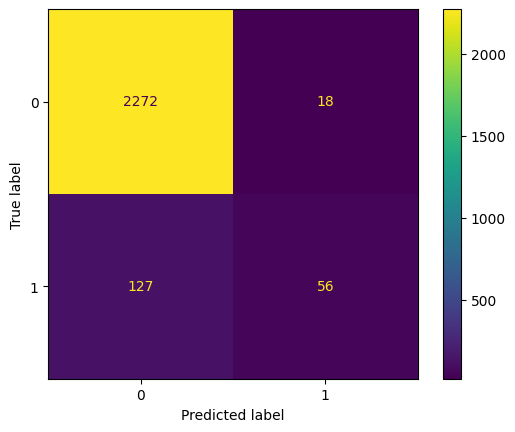

In [15]:
# Confusion Matrix for Logistic Regression

cm_results = confusion_matrix(y_validation, predictions_validation)
cm_display = ConfusionMatrixDisplay(cm_results)

cm_display.plot()



In [16]:
# Computing the importance of the feature "ind_acc_XYZ"
# Checking if existing customers of bank XYZ receive any favorable treatment

column_name = "ind_acc_XYZ"

column_index = list(df_training.columns).index(column_name)

feature_coefficient = model.coef_[0][column_index]

print(f"The feature coefficient for {column_name} is: {feature_coefficient}")


The feature coefficient for ind_acc_XYZ is: -0.07535776728533186


In [17]:
# Create a random forest classifier object
# Train the random forest model

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
# Use the random forest classifier to make predictions

predictions_validation = model.predict(X_validation)

In [19]:
# Assessing the random forest model performance

accuracy = accuracy_score(y_validation, predictions_validation)
precision = precision_score(y_validation, predictions_validation)
recall = recall_score(y_validation, predictions_validation)
F1 = f1_score(y_validation, predictions_validation)

print("Random Forest Results based on predictions from validation set")
print()

print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Recall is {recall}')
print(f'F1 score is {F1}')

Random Forest Results based on predictions from validation set

Accuracy is 0.9393449251920744
Precision is 0.7323943661971831
Recall is 0.28415300546448086
F1 score is 0.4094488188976378


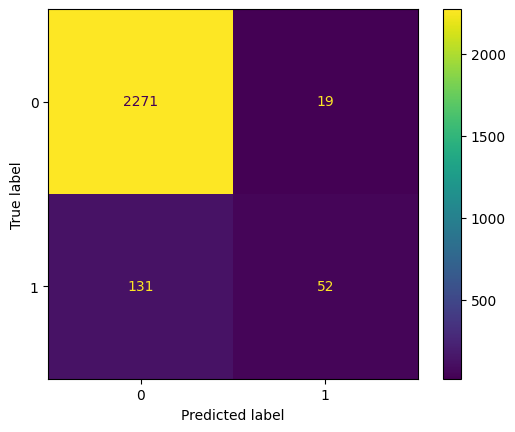

In [20]:
# Confusion Matrix for Random Forest

cm_results = confusion_matrix(y_validation, predictions_validation)
cm_display = ConfusionMatrixDisplay(cm_results)

cm_display.plot()



In [21]:
# Computing the importance of the feature "ind_acc_XYZ"
# Checking if existing customers of bank XYZ receive any favorable treatment

column_name = "ind_acc_XYZ"

column_index = list(df_training.columns).index(column_name)

feature_importance = model.feature_importances_[column_index]

print(f"The feature importance for {column_name} is: {feature_importance}")


The feature importance for ind_acc_XYZ is: 0.007733447181597566
